In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
X = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]).T
y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000])

m, n = X.shape

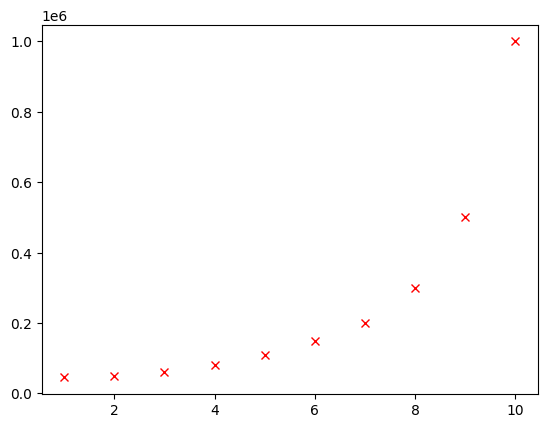

In [3]:
plt.plot(X, y, 'rx')

In [4]:
X = np.hstack((np.ones((m, 1)), X))

In [5]:
X = np.hstack((X, (X[:, 1] ** 2).reshape((m, 1)), (X[:, 1] ** 3).reshape((m, 1)), (X[:, 1] ** 4).reshape((m, 1)))); X

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [6]:
_, n = X.shape

In [7]:
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
np.mean(X[:, 1:], axis=0), np.std(X[:, 1:], axis=0)

(array([-1.11022302e-16,  4.44089210e-17,  0.00000000e+00,  0.00000000e+00]),
 array([1., 1., 1., 1.]))

In [8]:
def h(X, theta):
  return X @ theta

In [9]:
theta = np.random.random(n)

In [10]:
predictions = h(X, theta)
predictions

array([-2.51297322, -2.18743681, -1.79799341, -1.33006868, -0.76528274,
       -0.08145009,  0.74742034,  1.75112524,  2.96326685,  4.42125303])

In [11]:
h(X, theta), y

(array([-2.51297322, -2.18743681, -1.79799341, -1.33006868, -0.76528274,
        -0.08145009,  0.74742034,  1.75112524,  2.96326685,  4.42125303]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

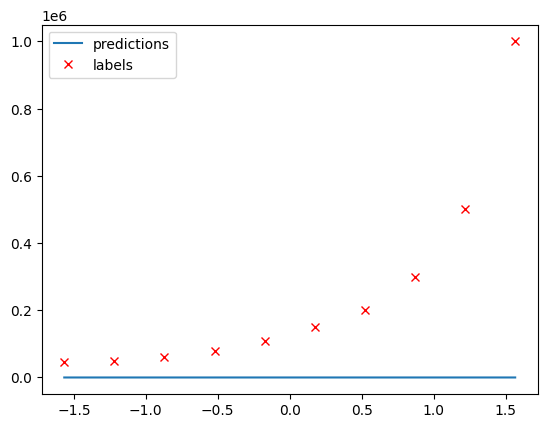

In [12]:
predictions = h(X, theta)
plt.plot(X[:, 1], predictions, label='predictions')
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()

In [13]:
def J(theta, X, y):
  return np.mean(np.square(h(X, theta) - y))

In [14]:
J(theta, X, y)

np.float64(142911291091.11572)

In [15]:
alpha = 0.01

In [16]:
losses = []
for _ in range(5000):
  theta = theta - alpha * (1/m) * (X.T @ ((X @ theta) - y))
  losses.append(J(theta, X, y))

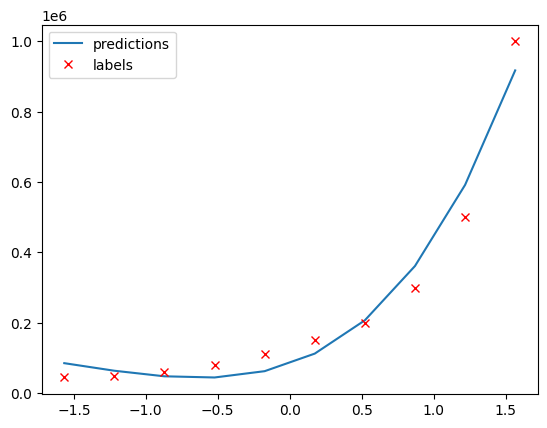

In [17]:
predictions = h(X, theta)
plt.plot(X[:, 1], predictions, label='predictions')
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()

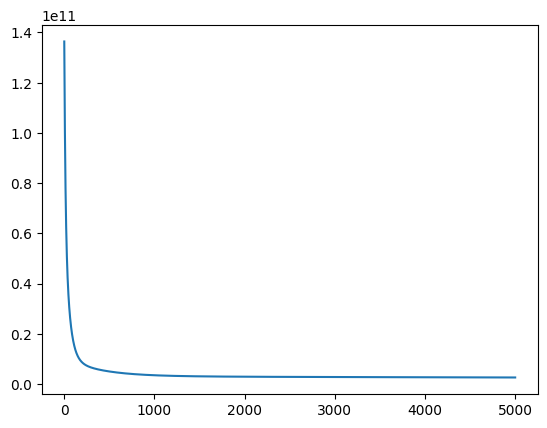

In [18]:
plt.plot(losses)

In [19]:
losses[-1]

np.float64(2596118146.994951)

In [20]:
theta = np.linalg.pinv(X.T@X) @ X.T @ y

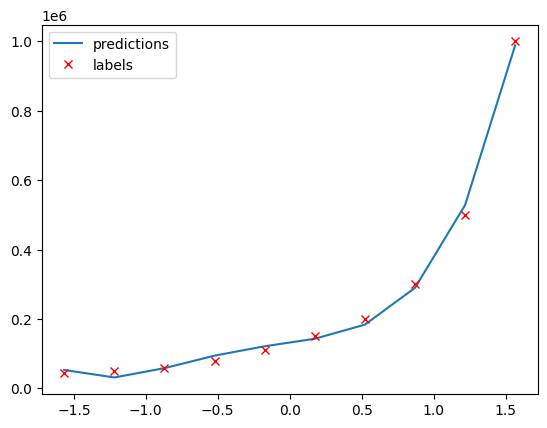

In [21]:
predictions = h(X, theta)
plt.plot(X[:, 1], predictions, label='predictions')
plt.plot(X[:, 1], y, 'rx', label='labels')
plt.legend()